In [4]:
import pandas as pd
from constants import *
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
fname = "data/ev_sales/BEV-PHEV-HEV-FCEV Sales By State for 2011-2021-EVAdoption.xlsx"
sample_df = pd.read_excel(fname, sheet_name = '2013')

In [6]:
# start_year = 2011
# end_year = 2019
# new_cols = [" ".join(i.split()[1:]) if len(i.split()) > 1 else i for i in sample_df.columns  ]
# df = pd.DataFrame(columns=new_cols)
# for year in range(start_year, end_year):
#     t_df = pd.read_excel(fname, sheet_name="{}".format(year))
#     t_df.columns = new_cols
#     t_df['year'] = str(year)
#     df = df.append(t_df)
    
start_year = 2011
end_year = 2019
read_cols = ["State", "FCEV Sales", "BEV Sales", "PHEV Sales"]
df = pd.DataFrame(columns=read_cols)
for year in range(start_year, end_year):
    filter_cols = ["{} {}".format(year, j) if i>0 else j for i, j in enumerate(read_cols)]
    t_df = pd.read_excel(fname, sheet_name="{}".format(year), usecols=filter_cols)
    t_df.columns = read_cols
    t_df['year'] = str(year)
    df = df.append(t_df)

C:\Users\Harshit Gujral\AppData\Local\Temp\ipykernel_49736\356990704.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(t_df)
C:\Users\Harshit Gujral\AppData\Local\Temp\ipykernel_49736\356990704.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(t_df)
C:\Users\Harshit Gujral\AppData\Local\Temp\ipykernel_49736\356990704.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(t_df)
C:\Users\Harshit Gujral\AppData\Local\Temp\ipykernel_49736\356990704.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(t_df)
C:\Users\Harshit Gujral\AppData\Local\Temp\ipykernel_49736\356990704.py:

In [7]:
df

,State,FCEV Sales,BEV Sales,PHEV Sales,year
0,Alabama,0,18,55,2011
1,Alaska,0,2,4,2011
2,Arizona,0,355,102,2011
3,Arkansas,0,2,20,2011
4,California,19,5062,1656,2011
...,...,...,...,...,...
47,Washington,0,9039,3611,2018
48,West Virginia,0,95,123,2018
49,Wisconsin,0,1168,788,2018
50,Wyoming,0,61,31,2018


In [12]:
combined_ev_sales_df = df.groupby(['State'])[["FCEV Sales", "BEV Sales", "PHEV Sales"]].sum().reset_index()

In [13]:
combined_ev_sales_df['State'] = combined_ev_sales_df['State'].replace("District of Columbia", "District Of Columbia")

In [14]:
epa_region = pd.read_csv("data/states_and_counties.csv")
epa_region = epa_region[['State Name','State Code', "EPA Region"]]
epa_region = epa_region[epa_region['State Code'] != 'CC']
epa_region['State Code'] = epa_region['State Code'].apply(int)
epa_region = epa_region.drop_duplicates(['State Code'], keep='first')
mdf = combined_ev_sales_df.merge(epa_region, left_on="State", right_on="State Name", how='left')

In [15]:
mdf

,State,FCEV Sales,BEV Sales,PHEV Sales,State Name,State Code,EPA Region
0,Alabama,0,1111,1376,Alabama,1.0,4.0
1,Alaska,0,233,301,Alaska,2.0,10.0
2,Arizona,0,11590,6539,Arizona,4.0,9.0
3,Arkansas,1,481,713,Arkansas,5.0,6.0
4,California,4804,273656,232952,California,6.0,9.0
5,Colorado,0,12361,7377,Colorado,8.0,8.0
6,Connecticut,1,4729,6187,Connecticut,9.0,1.0
7,Delaware,0,698,1197,Delaware,10.0,3.0
8,District Of Columbia,0,1144,1177,District Of Columbia,11.0,3.0
9,Florida,2,23361,17187,Florida,12.0,4.0


In [16]:
# mdf['ev_sales'] = mdf["FCEV Sales"] + mdf["BEV Sales"] +  mdf["PHEV Sales"] + mdf["HEV Sales"]
mdf['ev_sales'] =  mdf["FCEV Sales"] + mdf["BEV Sales"] +  mdf["PHEV Sales"] 

In [17]:
mdf

,State,FCEV Sales,BEV Sales,PHEV Sales,State Name,State Code,EPA Region,ev_sales
0,Alabama,0,1111,1376,Alabama,1.0,4.0,2487
1,Alaska,0,233,301,Alaska,2.0,10.0,534
2,Arizona,0,11590,6539,Arizona,4.0,9.0,18129
3,Arkansas,1,481,713,Arkansas,5.0,6.0,1195
4,California,4804,273656,232952,California,6.0,9.0,511412
5,Colorado,0,12361,7377,Colorado,8.0,8.0,19738
6,Connecticut,1,4729,6187,Connecticut,9.0,1.0,10917
7,Delaware,0,698,1197,Delaware,10.0,3.0,1895
8,District Of Columbia,0,1144,1177,District Of Columbia,11.0,3.0,2321
9,Florida,2,23361,17187,Florida,12.0,4.0,40550


In [18]:
total_us_ev_sales = mdf[mdf['State'] == 'Total US']['ev_sales'].tolist()[0]
mdf['us_percent'] = (mdf['ev_sales']*100)/total_us_ev_sales

In [19]:
mdf

,State,FCEV Sales,BEV Sales,PHEV Sales,State Name,State Code,EPA Region,ev_sales,us_percent
0,Alabama,0,1111,1376,Alabama,1.0,4.0,2487,0.236483
1,Alaska,0,233,301,Alaska,2.0,10.0,534,0.050777
2,Arizona,0,11590,6539,Arizona,4.0,9.0,18129,1.723848
3,Arkansas,1,481,713,Arkansas,5.0,6.0,1195,0.113630
4,California,4804,273656,232952,California,6.0,9.0,511412,48.629071
5,Colorado,0,12361,7377,Colorado,8.0,8.0,19738,1.876844
6,Connecticut,1,4729,6187,Connecticut,9.0,1.0,10917,1.038074
7,Delaware,0,698,1197,Delaware,10.0,3.0,1895,0.180191
8,District Of Columbia,0,1144,1177,District Of Columbia,11.0,3.0,2321,0.220699
9,Florida,2,23361,17187,Florida,12.0,4.0,40550,3.855813


In [20]:
mdf = mdf[~mdf['State Code'].isin(EXCLUDE_STATES)]
mdf_carb = mdf[mdf['State Code'].isin(ZEV_STATES)]
mdf_noncarb = mdf[~mdf['State Code'].isin(ZEV_STATES)]
mdf_noncarb = mdf_noncarb[mdf_noncarb['State']!='Total US']

In [21]:
mdf_carb['us_percent'].sum(), mdf_noncarb['us_percent'].sum()

(63.191871129329954, 26.088399376604013)

In [28]:
mdf_carb.to_csv("{}/{}_{}_{}.csv".format(OUTPUT_FILE, "carb_df_zev_sales", start_year, end_year), index=False)
mdf_noncarb.to_csv("{}/{}_{}_{}.csv".format(OUTPUT_FILE, "noncarb_df_zev_sales", start_year, end_year), index=False)

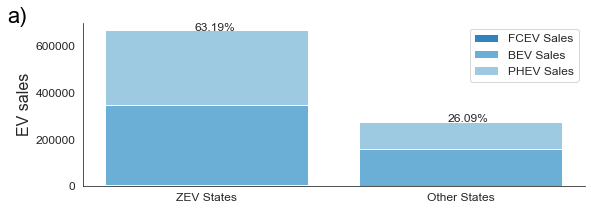

In [27]:
plt.rcParams.update({'font.size': 12})

sns.set_style('white')
cmap = plt.get_cmap('tab20c')

fig, ax = plt.subplots(figsize=(9,3))
ax.text(-0.15, 1, "a)", transform=ax.transAxes, size=22, color='black')

label = ['ZEV States', 'Other States']
fcev_sales = [mdf_carb['FCEV Sales'].sum(), mdf_noncarb['FCEV Sales'].sum()]
bev_sales = [mdf_carb['BEV Sales'].sum(), mdf_noncarb['BEV Sales'].sum()]
phev_sales = [mdf_carb['PHEV Sales'].sum(), mdf_noncarb['PHEV Sales'].sum()]
y1 = fcev_sales[0] + bev_sales[0] + phev_sales[0]
y2 = fcev_sales[1] + bev_sales[1] + phev_sales[1]

ax.text(-0.05, y1, "{:.2f}%".format(mdf_carb['us_percent'].sum())) 
ax.text(0.95, y2, "{:.2f}%".format(mdf_noncarb['us_percent'].sum())) 

plt.bar(label, fcev_sales, label = 'FCEV Sales', color = cmap(0))
plt.bar(label, bev_sales, bottom = fcev_sales, label = 'BEV Sales', color = cmap(1))
plt.bar(label, phev_sales, bottom = [i+j for i, j in zip(fcev_sales, bev_sales)], label='PHEV Sales', color = cmap(2))
plt.legend(loc='upper right')
plt.ylabel("EV sales", size=16)
sns.despine()
plt.savefig("{}/{}.png".format(OUTPUT_IMAGE, "zev_sales_a"), bbox_inches='tight')
plt.show()

In [23]:
epa_region[epa_region['State Code'].isin(EXCLUDE_STATES)]

,State Name,State Code,EPA Region
102,Arizona,4,9
250,Colorado,8,8
322,Delaware,10,3
325,District Of Columbia,11,3
1322,Minnesota,27,5
1805,New Mexico,35,6
2254,Pennsylvania,42,3
2966,Washington,53,10


In [ ]:
epa_region[epa_region['State Name'] == 'Minnesota']

In [ ]:
mdf_carb